# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# set Deafult Options
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.3f}'.format

# Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/uk-bank-customers/P6-UK-Bank-Customers.csv")

# Let's Get a Quick Overview of Our Data!!🤗

In [3]:
print(f"Observations: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Observations: 4014
Columns: 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4014 non-null   int64  
 1   Name                4014 non-null   object 
 2   Surname             4014 non-null   object 
 3   Gender              4014 non-null   object 
 4   Age                 4014 non-null   int64  
 5   Region              4014 non-null   object 
 6   Job Classification  4014 non-null   object 
 7   Date Joined         4014 non-null   object 
 8   Balance             4014 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [5]:
df.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object

In [6]:
df.head(10)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,"113,810.150"
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,"36,919.730"
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,"101,536.830"
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,"1,421.520"
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,"35,639.790"
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.Jan.15,"122,443.770"
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,"42,879.840"
7,200000008,Lisa,Knox,Female,48,Scotland,Other,11.Jan.15,"36,680.170"
8,300000009,Ruth,Campbell,Female,33,Wales,White Collar,11.Jan.15,"74,284.350"
9,100000010,Dominic,Parr,Male,42,England,White Collar,12.Jan.15,"10,912.450"


In [7]:
df[["Age", "Balance"]].describe()

,Age,Balance
count,"4,014.000","4,014.000"
mean,38.611,"39,766.448"
std,9.819,"29,859.489"
min,15.000,11.520
25%,31.000,"16,115.368"
50%,37.000,"33,567.330"
75%,45.000,"57,533.930"
max,64.000,"183,467.700"


# Now!! Let's Do Some Data Preprocessing!🤩

<h4 style="font: bold 20px tahoma">
    ► Firstly, Clean The Columns' Names From Any Spaces!
</h4>

In [8]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,Customer_ID,Name,Surname,Gender,Age,Region,Job_Classification,Date_Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,"113,810.150"
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,"36,919.730"
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,"101,536.830"
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,"1,421.520"
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,"35,639.790"


<h4 style="font: bold 20px tahoma">
    ► Now, Let's Dive Deeper into Each Column!!🧐🧐🤿
</h4>

<h4 style="font: bold 16px tahoma">
    • Customer_ID Column
</h4>


In [9]:
df["Customer_ID"].nunique()

4014

In [10]:
df["Customer_ID"].duplicated().sum()

0

<p style="font: bold 22px tahoma; color: lightgreen; background-color: #000; padding: 15px">
    That's Perfect!! 🤗🤗
    <span style="display: block; color: #FFD099; font-size: 16px; margin-top: 10px">
        ♣ Why?!? Beacuse That's a Problem, If There are Duplicated Custeomer ids in a Bank Dataset.
    </span>
</p>

<h4 style="font: bold 16px tahoma">
    • Name Column
</h4>

In [11]:
df["Name"].nunique()

172

In [12]:
print(f"Most Common Name: {df['Name'].mode()[0]}")

Most Common Name: Jason


<h4 style="font: bold 16px tahoma">
    • Surname Column
</h4>

In [13]:
df['Surname'].value_counts()

Surname
Kerr        41
Marshall    37
May         37
Forsyth     36
Miller      35
            ..
Carr        16
Kelly       15
Smith       15
Taylor      14
Brew         1
Name: count, Length: 150, dtype: int64

In [14]:
df["Surname"].nunique()

150

In [15]:
print(f"Most Common Surname: {df['Surname'].mode()[0]}")

Most Common Surname: Kerr


<h4 style="font: bold 16px tahoma">
    • Gender Column
</h4>

In [16]:
df["Gender"].value_counts(normalize=1) * 100

Gender
Male     53.936
Female   46.064
Name: proportion, dtype: float64

In [17]:
gender = df["Gender"].value_counts()
# Custome Color
colors = ["#113344", "#C23373"]
fig = px.bar(data_frame= gender, 
             color= gender.index, 
             color_discrete_sequence=colors,
            text_auto=True)

fig.update_traces(textfont_size=15, textposition="inside", cliponaxis=False)
fig.update_yaxes(title_text='Frequency')

<h4 style="font: bold 16px tahoma">
    • Age Column
</h4>

In [18]:
df["Age"].describe()

count   4,014.000
mean       38.611
std         9.819
min        15.000
25%        31.000
50%        37.000
75%        45.000
max        64.000
Name: Age, dtype: float64

##### ►►Let's Look at The Age Distribution

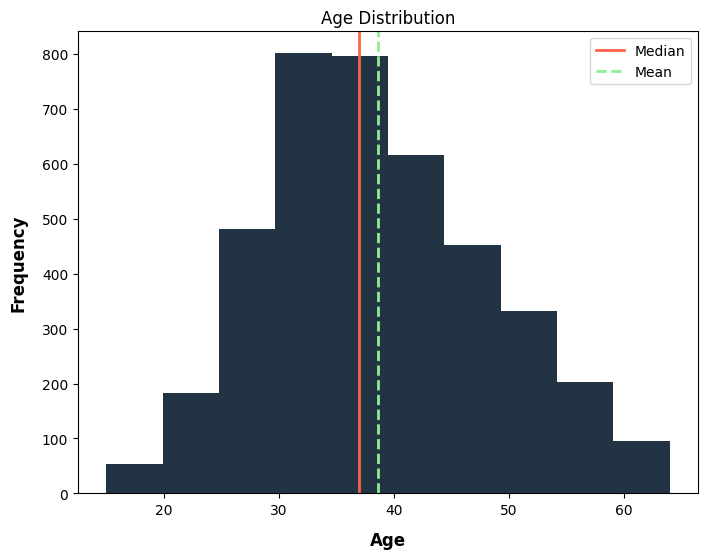

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], color="#234")


# Median Line
plt.axvline(df["Age"].median(), color="tomato", 
            linewidth=2, label="Median")

# Mean Line
plt.axvline(df["Age"].mean(),  linestyle="--", 
            color= "lightgreen", linewidth=2, label="Mean")

plt.title('Age Distribution')
plt.xlabel('Age', labelpad = 10, fontsize = 12, fontweight="bold")
plt.ylabel("Frequency", labelpad = 10, fontsize = 12, fontweight="bold")
plt.axis(True)
plt.legend()
plt.show()

<p style="font: bold 22px tahoma; color: gold; background-color: #323232; padding: 15px">
    That's Perfect!.🤗
    <span style="display: block; color: #FFD099; font-size: 16px">
        ♣ From The Previous Graph & Describe Method; Noticed That The Median and Mean Almost Close To Each Other.
    </span>
</p>

<h4 style="font: bold 16px tahoma">
    • Region Column
</h4>

In [20]:
df["Region"].unique()

array(['England', 'Northern Ireland', 'Wales', 'Scotland'], dtype=object)

In [21]:
df["Region"].value_counts(normalize=1)*100

Region
England            53.787
Scotland           28.002
Wales              12.955
Northern Ireland    5.257
Name: proportion, dtype: float64

In [22]:
regions = df["Region"].value_counts()

# Custome Color
colors = ["#45FFCA", "#D67BFF", "#FBA1B7", "#79E0EE"]

fig = px.bar(data_frame= regions, 
             color= regions.index, 
             color_discrete_sequence=colors,
            text_auto=",.0f")

fig.update_traces(textfont_size=15, textposition="inside", cliponaxis=False)
fig.update_yaxes(title_text='Counts')

<h4 style="font: bold 16px tahoma">
    • Job_Classification Column
</h4>

In [23]:
df["Job_Classification"].unique()

array(['White Collar', 'Blue Collar', 'Other'], dtype=object)

In [24]:
df["Job_Classification"].value_counts(normalize=1)*100

Job_Classification
White Collar   48.705
Blue Collar    26.134
Other          25.162
Name: proportion, dtype: float64

In [25]:
job_clssification = df["Region"].value_counts()

# Custome Color
colors = ["#45FFCA", "#D67BFF", "#FBA1B7", "#79E0EE"]

fig = px.pie(data_frame= job_clssification, 
             values = job_clssification,
             names = job_clssification.index,
             color_discrete_sequence = colors,
             title='Count of Our Regions',
            )

# Custom Formatting
fig.update_traces(textinfo='label+percent', 
                  textfont_size = 15, 
                  textfont_family = "tahoma",
                  pull=[0, 0, 0, 0.4],
                 )
fig.show()

<h4 style="font: bold 16px tahoma">
    • Date_Joined Column
</h4>

In [26]:
df["Date_Joined"].head()

0    05.Jan.15
1    06.Jan.15
2    07.Jan.15
3    08.Jan.15
4    09.Jan.15
Name: Date_Joined, dtype: object

In [27]:
df["Date_Joined"].dtype

dtype('O')

## ►► Convering Date_Joined from String inot DateTime

In [28]:
df["Date_Joined"] = pd.to_datetime(df["Date_Joined"], format="mixed")
df["Date_Joined"].dtype

dtype('<M8[ns]')

In [29]:
print(f"• Old(First) Date: {df['Date_Joined'].min()}")
print(f"• Newets(Last) Date: {df['Date_Joined'].max()}")

• Old(First) Date: 2015-01-05 00:00:00
• Newets(Last) Date: 2015-12-30 00:00:00


<h4 style="font: bold 16px tahoma">
    • Balance Column 💰💰💵
</h4>

In [30]:
df["Balance"].describe()

count     4,014.000
mean     39,766.448
std      29,859.489
min          11.520
25%      16,115.368
50%      33,567.330
75%      57,533.930
max     183,467.700
Name: Balance, dtype: float64

In [31]:
# Ouliers Detection Using Box Plot
px.box(data_frame= df, x=df["Balance"])

<p style="font: bold 22px tahoma; color: tomato; background-color: #234; padding: 15px">
    I Guess We Will Not Remove These Outliers!🤔
    <span style="display: block; color: #FFD099; font-size: 17px; margin-top: 12px">
            🤩Excited To See The Job Classification of Users That Balance Outliers Belong to!!🤩🤭<br>
               🧐And We Want To Know Users With The Max Values.
    </span>
</p>

# Now Time To Our Lovely Part 😍🥰!! 
## Ask Questions & Get Insights📊💡

In [32]:
df.head()

,Customer_ID,Name,Surname,Gender,Age,Region,Job_Classification,Date_Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,2015-01-05,"113,810.150"
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,"36,919.730"
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,"101,536.830"
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,"1,421.520"
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,"35,639.790"


<h4 style="font: bold 20px tahoma">
    • What Was The Total & Average Balance in Our Bank Each Month?!?
</h4>

In [33]:
date_by_balance = df.groupby(df["Date_Joined"].dt.month)["Balance"].agg(["sum", "mean"])
date_by_balance.index.name = "Month"
date_by_balance

,sum,mean
Month,,
1,"1,410,718.480","35,267.962"
2,"1,205,743.300","33,492.869"
3,"1,860,165.570","39,577.991"
4,"8,148,492.890","36,704.923"
5,"16,847,597.850","39,641.407"
6,"11,258,576.150","40,498.475"
7,"16,303,081.950","38,816.862"
8,"17,155,057.410","42,253.836"
9,"22,767,097.070","43,201.323"


In [34]:
fig = px.line(data_frame=date_by_balance, 
               x = date_by_balance.index,
               y = [date_by_balance["sum"]],
               title="Total Balance Via Month",
               markers=True
              )

# Custom Format
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = date_by_balance.index,
        ticktext = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    )
)

fig.update_yaxes(title_text='Total Balance')
fig.update_traces(line_color='#164863', line_width = 3)
fig.show()

<h4 style="font: bold 20px tahoma">
    • Now, We Want To Know What Was The Total Balance For Each Region?! 🌍💵
</h4>

In [35]:
balance_via_regions = df.pivot_table(index = "Region", values="Balance", 
                                     aggfunc="sum").sort_values("Balance", ascending=False)

balance_via_regions

,Balance
Region,
England,"84,833,397.000"
Scotland,"44,410,730.720"
Wales,"22,042,829.260"
Northern Ireland,"8,335,566.390"


<h4 style="font: bold 18px tahoma">
    <q>
        <i>A  Picture Is Worth a Thousand Words</i>
    </q>
</h4>

In [36]:
# Custome Color
colors = ["#18FFCA", "#D67BFF", "#FBA1B7", "#79E0EE"]
fig = px.bar(data_frame= balance_via_regions, 
             color= balance_via_regions.index, 
             color_discrete_sequence= colors,
            text_auto = ",.0f")

fig.update_traces(textfont_size=14, textposition="outside", cliponaxis=False)
fig.update_yaxes(title_text='Balance')

<h4 style="font: bold 20px tahoma">
    • 👦Have You Eever Asked If There Is Any Correlation Between Age & Balance?!?!👨💵
</h4>

In [37]:
age_balance_corr = df[['Age', "Balance"]].corr(numeric_only=True)
age_balance_corr

,Age,Balance
Age,1.000,0.009
Balance,0.009,1.000


<Axes: >

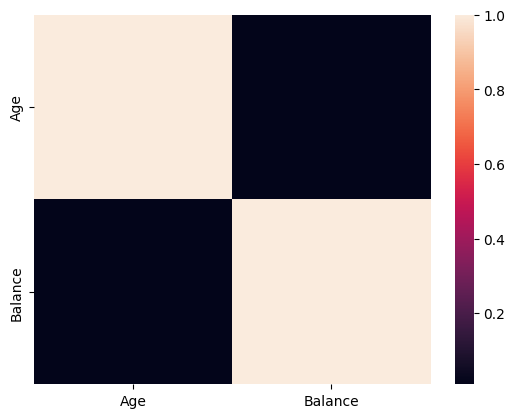

In [38]:
sns.heatmap(age_balance_corr)

<p style="font: bold 22px tahoma; color: tomato; background-color: #234; padding: 15px">
    There is No Correlation or Relation Between Age and Balance Account!
</p>

<h4 style="font: bold 26px tahoma">
    • 👨‍🏫👩‍👦What is the Total Balance for Each Job Classification?👨‍💻👨‍🔬💵
</h4>


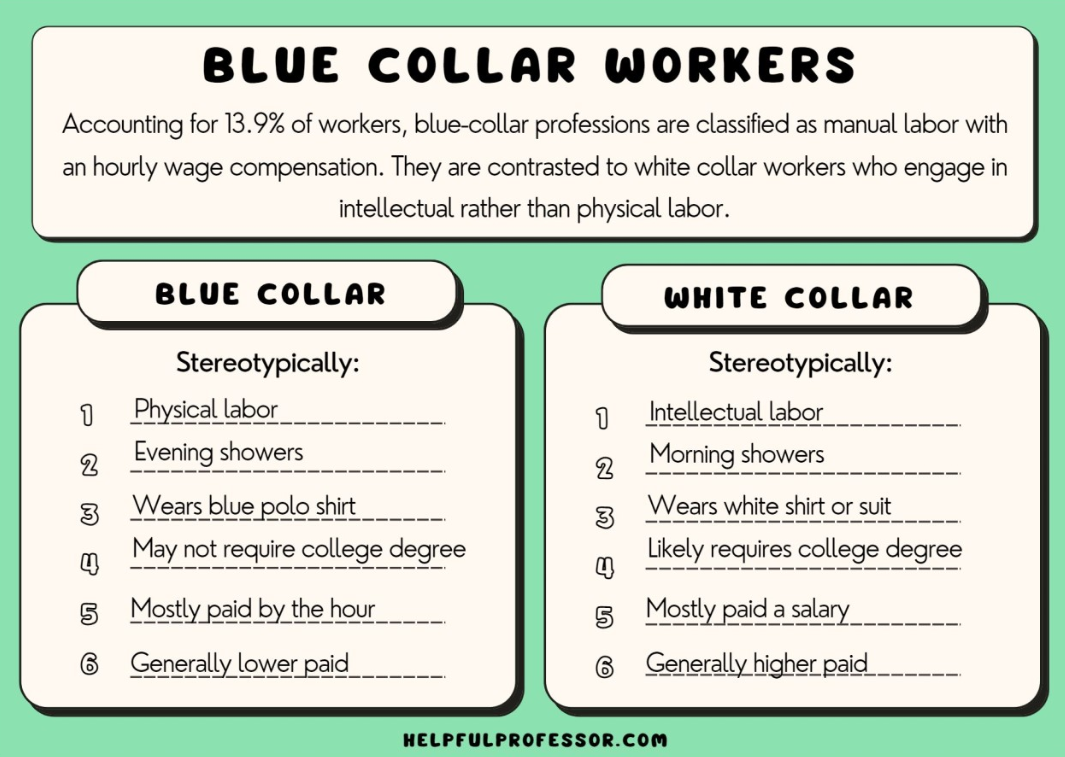


In [39]:
balance_by_job = df.groupby("Job_Classification")["Balance"].sum().sort_values(ascending=False)
balance_by_job

Job_Classification
White Collar   78,065,883.040
Blue Collar    41,334,055.500
Other          40,222,584.830
Name: Balance, dtype: float64

In [40]:
fig = px.bar(data_frame= balance_by_job, 
             color = balance_by_job.index,
             color_discrete_map = {
                 "White Collar":"#141E46",
                 "Blue Collar":"#C70039",
                 "Other":"#22A699"
             })

fig.update_yaxes(title_text='Balance')
fig.show()

<p style="font: bold 22px tahoma; color: lightgreen; background-color: #234; padding: 15px">
    That Was Expected!! <br> According To Previous Image That Shows The Difference Between Popular 2 Types of Worker👨‍💻👨‍🏫
</p>

# Curious Quick Question😁😙!!
## ►► I Want To Know Information about The Top 5 Customers That Have the Highest Balance ?!?

In [41]:
filt = df["Balance"].nlargest(5)

df.loc[filt.index]

,Customer_ID,Name,Surname,Gender,Age,Region,Job_Classification,Date_Joined,Balance
1306,100001307,Dorothy,Jackson,Female,31,England,White Collar,2015-07-22,"183,467.700"
3449,100003450,Carl,Fraser,Male,35,England,White Collar,2015-11-30,"181,680.990"
2009,200002010,Connor,North,Male,50,Scotland,Other,2015-09-11,"172,085.480"
3831,100003832,Sebastian,Arnold,Male,44,England,Blue Collar,2015-12-20,"161,517.820"
913,400000914,Anna,Randall,Female,25,Northern Ireland,Blue Collar,2015-06-18,"149,698.120"
